# **Predicting a Country's Happiness Index**

# **Data Processing**

In [1]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.cluster import KMeans
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, classification_report, accuracy_score, confusion_matrix
from sklearn.preprocessing import MinMaxScaler
from imblearn.over_sampling import SMOTE
import numpy as np

# Step 1: Load the datasets for each year
file_2018 = pd.read_csv('2018.csv')
file_2019 = pd.read_csv('2019.csv')
file_2020 = pd.read_csv('2020.csv')
file_2021 = pd.read_csv('2021.csv')
file_2022 = pd.read_csv('2022.csv')

# Step 2: Define common columns
common_columns = [
    'country_name', 'year', 'life_ladder', 'log_gdp_per_capita',
    'social_support', 'healthy_life_expectancy_at_birth',
    'freedom_to_make_life_choices', 'generosity', 'corruption'
]

# Step 3: Rename columns for consistency across the years
file_2018.rename(columns={
    'Country or region': 'country_name',
    'Score': 'life_ladder',
    'GDP per capita': 'log_gdp_per_capita',
    'Social support': 'social_support',
    'Healthy life expectancy': 'healthy_life_expectancy_at_birth',
    'Freedom to make life choices': 'freedom_to_make_life_choices',
    'Generosity': 'generosity',
    'Perceptions of corruption': 'corruption'
}, inplace=True)

file_2019.rename(columns={
    'Country or region': 'country_name',
    'Score': 'life_ladder',
    'GDP per capita': 'log_gdp_per_capita',
    'Social support': 'social_support',
    'Healthy life expectancy': 'healthy_life_expectancy_at_birth',
    'Freedom to make life choices': 'freedom_to_make_life_choices',
    'Generosity': 'generosity',
    'Perceptions of corruption': 'corruption'
}, inplace=True)

file_2020.rename(columns={
    'Country name': 'country_name',
    'Ladder score': 'life_ladder',
    'Logged GDP per capita': 'log_gdp_per_capita',
    'Social support': 'social_support',
    'Healthy life expectancy': 'healthy_life_expectancy_at_birth',
    'Freedom to make life choices': 'freedom_to_make_life_choices',
    'Generosity': 'generosity',
    'Perceptions of corruption': 'corruption'
}, inplace=True)

file_2021.rename(columns={
    'Country name': 'country_name',
    'Ladder score': 'life_ladder',
    'Logged GDP per capita': 'log_gdp_per_capita',
    'Social support': 'social_support',
    'Healthy life expectancy': 'healthy_life_expectancy_at_birth',
    'Freedom to make life choices': 'freedom_to_make_life_choices',
    'Generosity': 'generosity',
    'Perceptions of corruption': 'corruption'
}, inplace=True)

file_2022.rename(columns={
    'Country': 'country_name',
    'Happiness score': 'life_ladder',
    'Whisker-high': 'whisker_high',
    'Whisker-low': 'whisker_low',
    'Dystopia (1.83) + residual': 'dystopia_residual',
    'Explained by: GDP per capita': 'log_gdp_per_capita',
    'Explained by: Social support': 'social_support',
    'Explained by: Healthy life expectancy': 'healthy_life_expectancy_at_birth',
    'Explained by: Freedom to make life choices': 'freedom_to_make_life_choices',
    'Explained by: Generosity': 'generosity',
    'Explained by: Perceptions of corruption': 'corruption'
}, inplace=True)

# Step 4: Add 'year' column to each dataset
file_2018['year'] = 2018
file_2019['year'] = 2019
file_2020['year'] = 2020
file_2021['year'] = 2021
file_2022['year'] = 2022

# Step 5: Verify columns after renaming
print("Columns in 2018 dataset:", file_2018.columns)
print("Columns in 2019 dataset:", file_2019.columns)
print("Columns in 2020 dataset:", file_2020.columns)
print("Columns in 2021 dataset:", file_2021.columns)
print("Columns in 2022 dataset:", file_2022.columns)

# Step 6: Retain only the common columns for each dataset
file_2018 = file_2018[common_columns]
file_2019 = file_2019[common_columns]
file_2020 = file_2020[common_columns]
file_2021 = file_2021[common_columns]
file_2022 = file_2022[common_columns]

# Step 7: Combine all the datasets into one DataFrame
combined_data = pd.concat([file_2018, file_2019, file_2020, file_2021, file_2022], ignore_index=True)

# Step 8: Drop missing values (if any)
combined_data.dropna(inplace=True)

# Step 9: Display the first few rows of the combined data
print(combined_data.head())


Columns in 2018 dataset: Index(['Overall rank', 'country_name', 'life_ladder', 'log_gdp_per_capita',
       'social_support', 'healthy_life_expectancy_at_birth',
       'freedom_to_make_life_choices', 'generosity', 'corruption', 'year'],
      dtype='object')
Columns in 2019 dataset: Index(['Overall rank', 'country_name', 'life_ladder', 'log_gdp_per_capita',
       'social_support', 'healthy_life_expectancy_at_birth',
       'freedom_to_make_life_choices', 'generosity', 'corruption', 'year'],
      dtype='object')
Columns in 2020 dataset: Index(['country_name', 'Regional indicator', 'life_ladder',
       'Standard error of ladder score', 'upperwhisker', 'lowerwhisker',
       'log_gdp_per_capita', 'social_support',
       'healthy_life_expectancy_at_birth', 'freedom_to_make_life_choices',
       'generosity', 'corruption', 'Ladder score in Dystopia',
       'Explained by: Log GDP per capita', 'Explained by: Social support',
       'Explained by: Healthy life expectancy',
       'Explai

In [2]:
print(combined_data.shape)
combined_data.head()

(759, 9)


,country_name,year,life_ladder,log_gdp_per_capita,social_support,healthy_life_expectancy_at_birth,freedom_to_make_life_choices,generosity,corruption
0,Finland,2018,7.632,1.305,1.592,0.874,0.681,0.202,0.393
1,Norway,2018,7.594,1.456,1.582,0.861,0.686,0.286,0.340
2,Denmark,2018,7.555,1.351,1.590,0.868,0.683,0.284,0.408
3,Iceland,2018,7.495,1.343,1.644,0.914,0.677,0.353,0.138
4,Switzerland,2018,7.487,1.420,1.549,0.927,0.660,0.256,0.357


In [3]:
combined_data.describe()

,year,life_ladder,log_gdp_per_capita,social_support,healthy_life_expectancy_at_birth,freedom_to_make_life_choices,generosity,corruption
count,759.000000,759.000000,759.000000,759.000000,759.000000,759.000000,759.000000,759.000000
mean,2019.967062,5.465081,4.363294,0.994007,26.133502,0.586531,0.097391,0.365968
std,1.410560,1.100620,4.150345,0.302678,31.685543,0.217193,0.150684,0.327643
min,2018.000000,2.404000,0.000000,0.000000,0.000000,0.000000,-0.300907,0.000000
25%,2019.000000,4.639500,0.980500,0.804193,0.615000,0.441000,0.017917,0.079000
50%,2020.000000,5.477000,1.474000,0.927000,0.861000,0.585000,0.109000,0.183000
75%,2021.000000,6.223000,9.069000,1.223000,64.102524,0.753000,0.194500,0.738723
max,2022.000000,7.842000,11.647000,1.644000,76.953000,0.974998,0.598000,0.939000


In [4]:
combined_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 759 entries, 0 to 759
Data columns (total 9 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   country_name                      759 non-null    object 
 1   year                              759 non-null    int64  
 2   life_ladder                       759 non-null    float64
 3   log_gdp_per_capita                759 non-null    float64
 4   social_support                    759 non-null    float64
 5   healthy_life_expectancy_at_birth  759 non-null    float64
 6   freedom_to_make_life_choices      759 non-null    float64
 7   generosity                        759 non-null    float64
 8   corruption                        759 non-null    float64
dtypes: float64(7), int64(1), object(1)
memory usage: 59.3+ KB


# **2. Preliminary Visualizations**

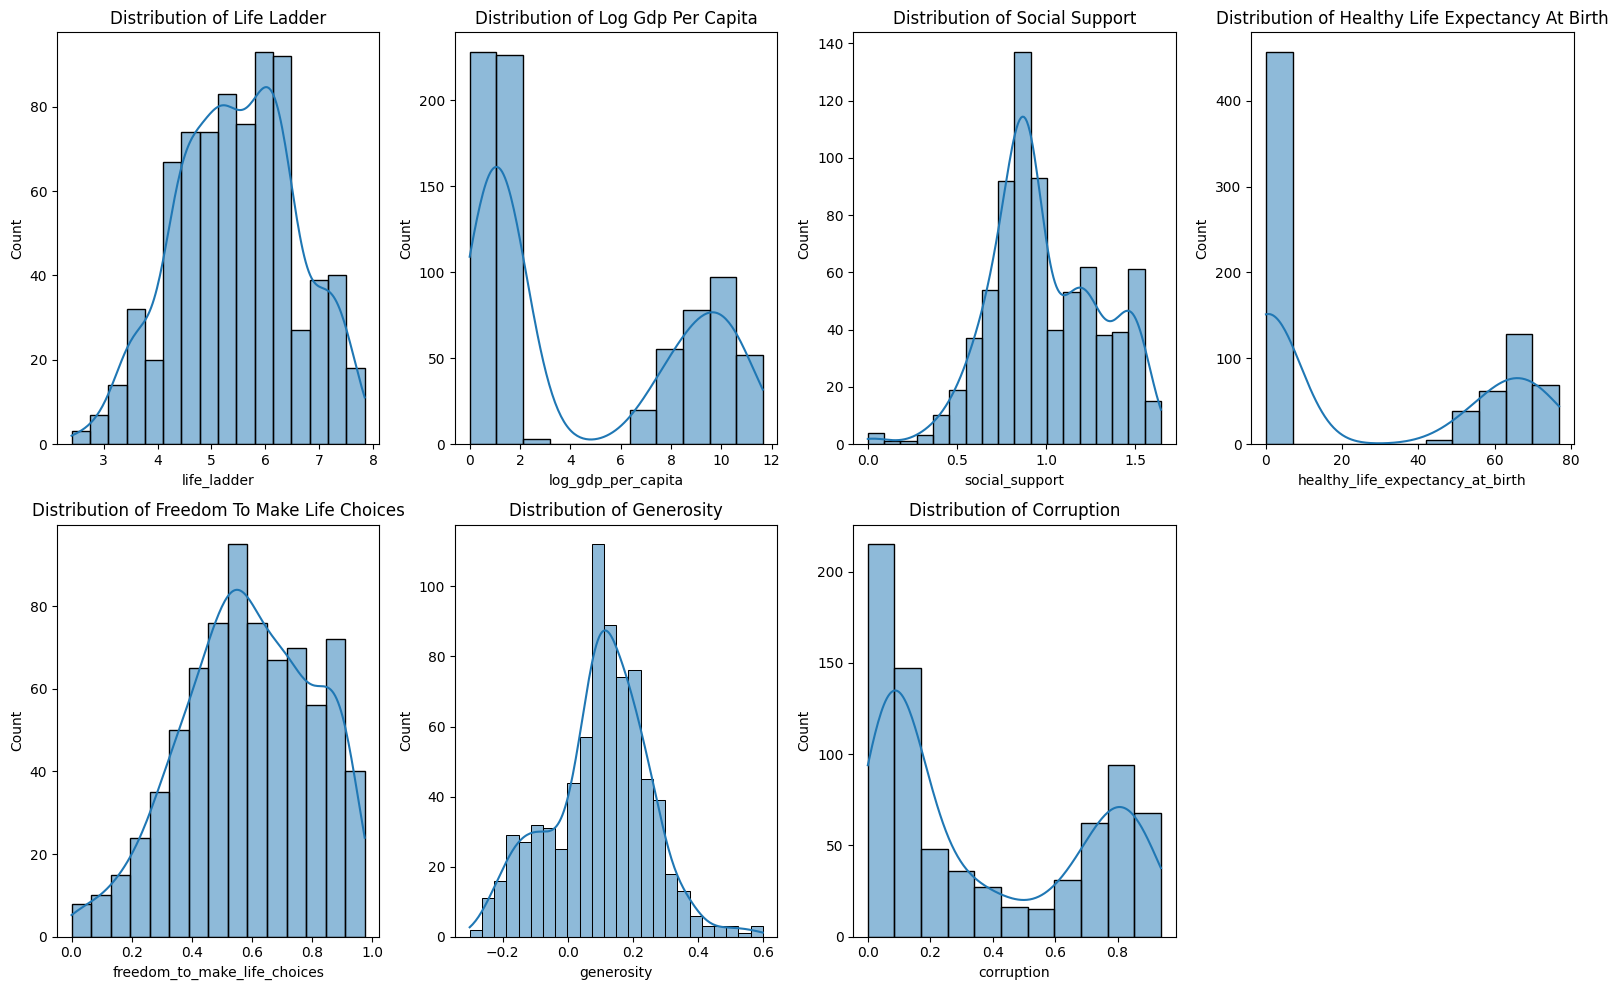

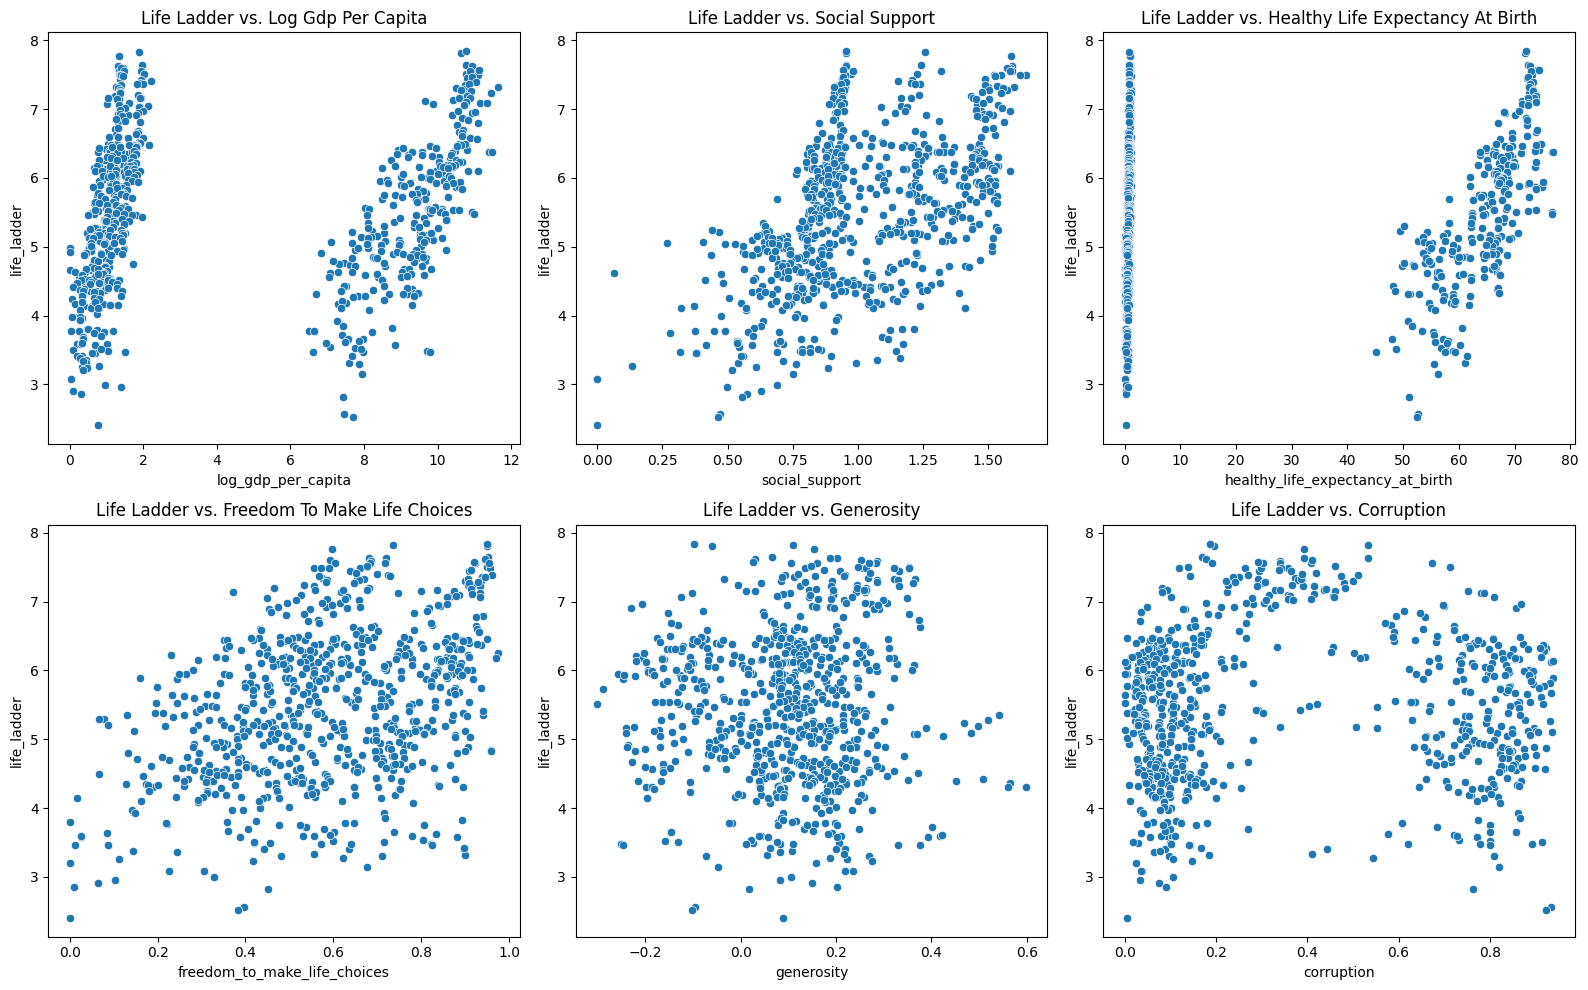

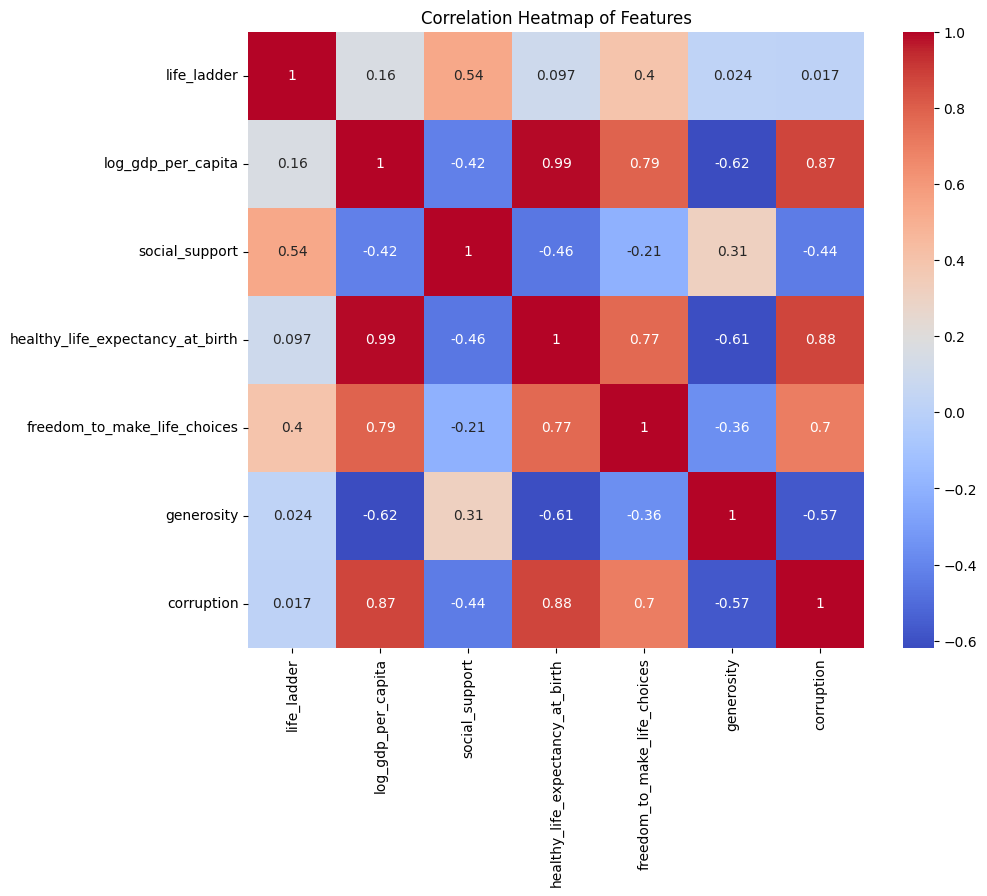

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

# Step 2: Exploratory Visualizations
features = [
    'life_ladder', 'log_gdp_per_capita', 'social_support',
    'healthy_life_expectancy_at_birth', 'freedom_to_make_life_choices',
    'generosity', 'corruption'  # Correct column name here
]

# Distribution plots for key features
plt.figure(figsize=(16, 10))
for i, feature in enumerate(features, 1):
    plt.subplot(2, 4, i)
    sns.histplot(combined_data[feature], kde=True)
    plt.title(f'Distribution of {feature.replace("_", " ").title()}')
plt.tight_layout()
plt.show()

# Scatter plots for relationships with life_ladder
plt.figure(figsize=(16, 10))
for i, feature in enumerate(features[1:], 1):  # Skip 'life_ladder' itself
    plt.subplot(2, 3, i)
    sns.scatterplot(data=combined_data, x=feature, y='life_ladder')
    plt.title(f'Life Ladder vs. {feature.replace("_", " ").title()}')
plt.tight_layout()
plt.show()

# Correlation heatmap
plt.figure(figsize=(10, 8))
corr_matrix = combined_data[features].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', square=True)
plt.title('Correlation Heatmap of Features')
plt.show()


# **3. Data Processing**

In [6]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

# Step 3: Data Scaling and Modeling Setup
selected_features = [
    'log_gdp_per_capita', 'social_support',
    'healthy_life_expectancy_at_birth', 'freedom_to_make_life_choices',
    'generosity', 'corruption'  # Correct column name here
]
X = combined_data[selected_features]
y = combined_data['life_ladder']

# Apply Min-Max Scaling
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# **4. Random Forest and Evaluations**

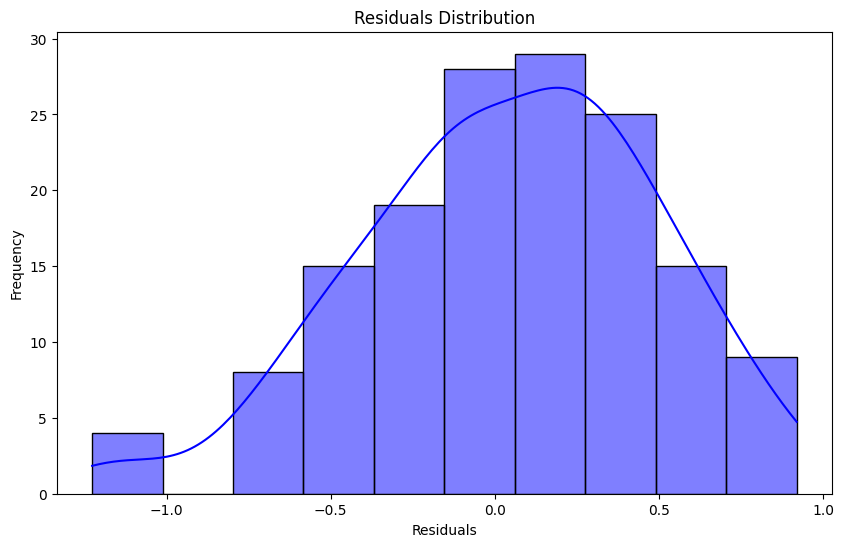

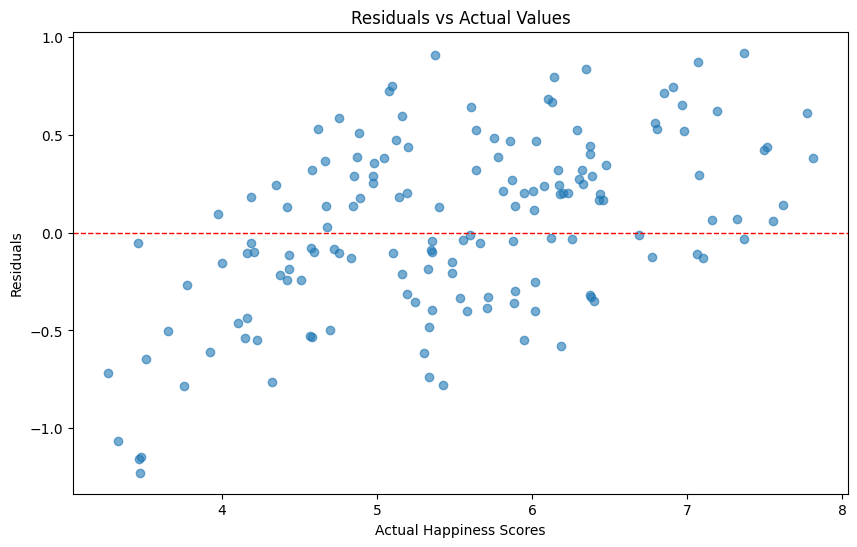

Testing RMSE: 0.446
Testing R²: 0.824


<ipython-input-8-ff78d8f32faa>:64: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feature_importance, palette='viridis')


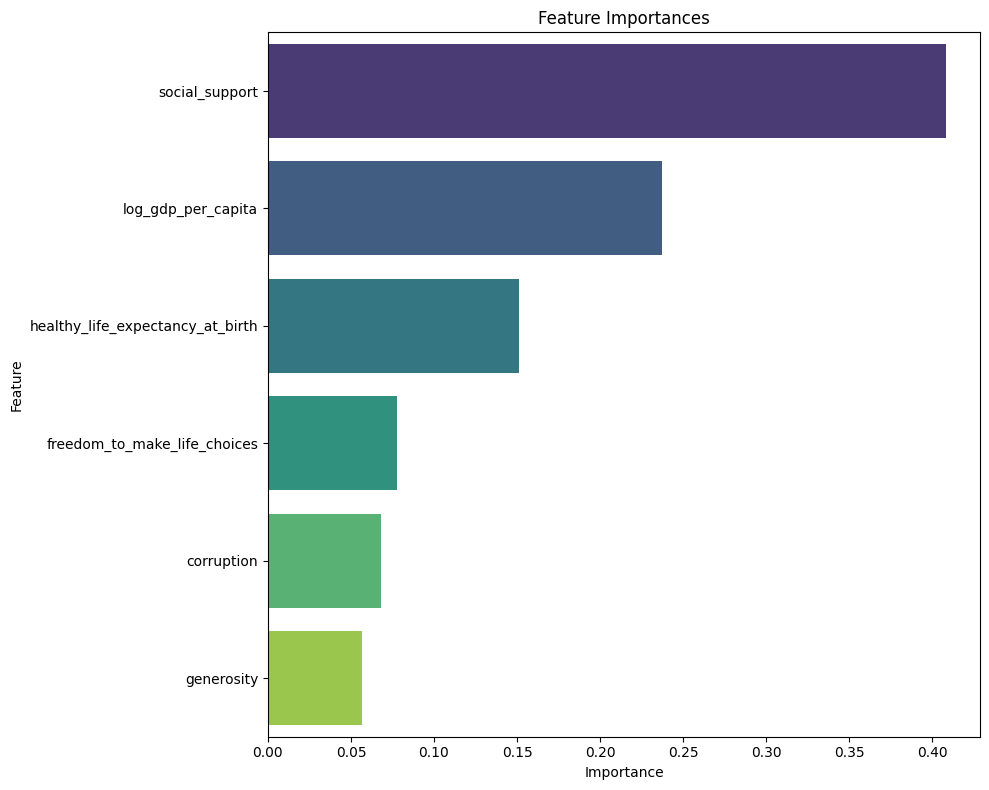

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Classification Accuracy: 0.861
Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.85      0.87       110
           1       0.83      0.87      0.85        91

    accuracy                           0.86       201
   macro avg       0.86      0.86      0.86       201
weighted avg       0.86      0.86      0.86       201



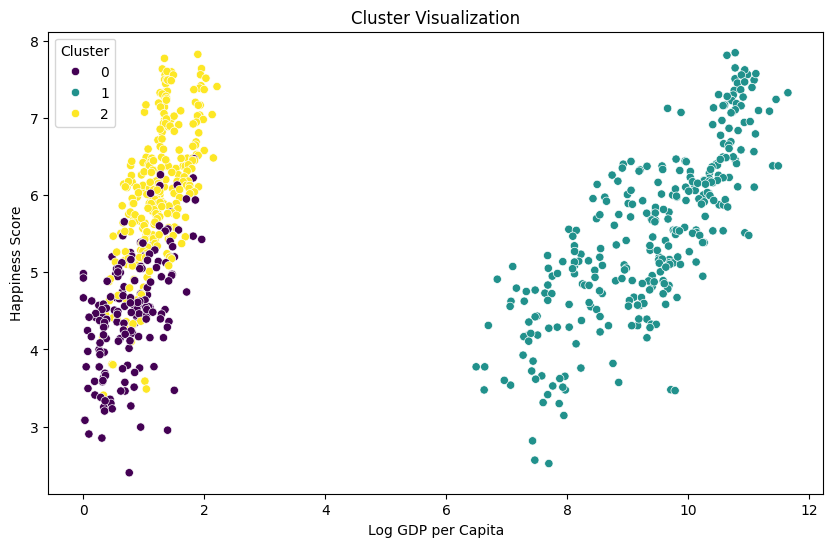

Index(['country_name', 'life_ladder', 'standard_error_of_ladder_score',
       'upperwhisker', 'lowerwhisker', 'log_gdp_per_capita', 'social_support',
       'healthy_life_expectancy_at_birth', 'freedom_to_make_life_choices',
       'generosity', 'corruption', 'ladder_score_in_dystopia',
       'explained_by:_log_gdp_per_capita', 'explained_by:_social_support',
       'explained_by:_healthy_life_expectancy',
       'explained_by:_freedom_to_make_life_choices',
       'explained_by:_generosity', 'explained_by:_perceptions_of_corruption',
       'dystopia_+_residual'],
      dtype='object')
2023 Data RMSE: 0.450


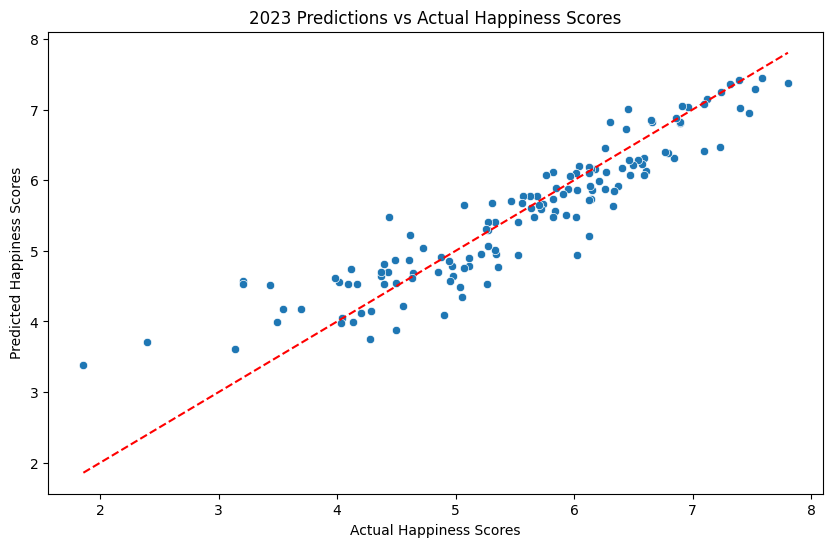

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from imblearn.over_sampling import SMOTE
from sklearn.cluster import KMeans

# Step 1: Data Preprocessing (Assuming combined_data is already prepared)
selected_features = [
    'log_gdp_per_capita', 'social_support', 'healthy_life_expectancy_at_birth',
    'freedom_to_make_life_choices', 'generosity', 'corruption' # Changed 'perceptions_of_corruption' to 'corruption'
]

X = combined_data[selected_features]
y = combined_data['life_ladder']

# Apply Min-Max Scaling
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Step 2: Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Step 3: Train Random Forest and Evaluate
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

y_train_pred = rf_model.predict(X_train)
y_test_pred = rf_model.predict(X_test)

# Residual Analysis
residuals = y_test - y_test_pred
plt.figure(figsize=(10, 6))
sns.histplot(residuals, kde=True, color='blue')
plt.title('Residuals Distribution')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(10, 6))
plt.scatter(y_test, residuals, alpha=0.6)
plt.axhline(0, color='red', linestyle='--', linewidth=1)
plt.title('Residuals vs Actual Values')
plt.xlabel('Actual Happiness Scores')
plt.ylabel('Residuals')
plt.show()

# Evaluate RMSE and R²
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
r2_test = r2_score(y_test, y_test_pred)
print(f"Testing RMSE: {rmse_test:.3f}")
print(f"Testing R²: {r2_test:.3f}")

# Feature Importance Analysis
importances = rf_model.feature_importances_
feature_importance = pd.DataFrame({'Feature': selected_features, 'Importance': importances}).sort_values(by='Importance', ascending=False)
plt.figure(figsize=(10, 8))
sns.barplot(x='Importance', y='Feature', data=feature_importance, palette='viridis')
plt.title('Feature Importances')
plt.tight_layout()
plt.show()

# Step 4: Classification Model
threshold = 6.0  # Define threshold for "Happy"
combined_data['Happy'] = (combined_data['life_ladder'] > threshold).astype(int)

X_classification = combined_data[selected_features]
y_classification = combined_data['Happy']

# Apply SMOTE to balance the classes
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_classification, y_classification)

X_train_c, X_test_c, y_train_c, y_test_c = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

logreg = LogisticRegression(random_state=42)
logreg.fit(X_train_c, y_train_c)

y_pred_c = logreg.predict(X_test_c)
accuracy = accuracy_score(y_test_c, y_pred_c)
print(f"Classification Accuracy: {accuracy:.3f}")
print("Classification Report:")
print(classification_report(y_test_c, y_pred_c))

# Step 5: Clustering Analysis
kmeans = KMeans(n_clusters=3, random_state=42)
combined_data['Cluster'] = kmeans.fit_predict(X_scaled)

# Visualize Clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x=combined_data['log_gdp_per_capita'], y=combined_data['life_ladder'], hue=combined_data['Cluster'], palette='viridis')
plt.title('Cluster Visualization')
plt.xlabel('Log GDP per Capita')
plt.ylabel('Happiness Score')
plt.show()

# Step 6: Testing on 2023 Dataset (Fix selected features based on available columns)
file_2023 = pd.read_csv('2023.csv')  # Replace with actual file path

# Standardize column names
file_2023.columns = file_2023.columns.str.strip().str.replace(' ', '_').str.lower()

# Rename columns to match the training data
file_2023.rename(columns={
    'ladder_score': 'life_ladder',
    'logged_gdp_per_capita': 'log_gdp_per_capita',
    'healthy_life_expectancy': 'healthy_life_expectancy_at_birth',
    # Rename 'perceptions_of_corruption' to 'corruption' for consistency
    'perceptions_of_corruption': 'corruption'
}, inplace=True)

# ... (rest of the code remains the same)

# Check available columns in the 2023 dataset
print(file_2023.columns)

# Available features for the 2023 dataset (corrected)
available_features = [
    'log_gdp_per_capita', 'social_support', 'healthy_life_expectancy_at_birth',
    'freedom_to_make_life_choices', 'generosity', 'corruption'  # Use 'corruption' here
]

# Filter out columns from 'selected_features' that are not in the 2023 dataset
selected_features_2023 = [feature for feature in available_features if feature in file_2023.columns]

# Select relevant columns for 2023 dataset
file_2023 = file_2023[selected_features_2023 + ['life_ladder']].dropna()

# Separate features and target
X_2023 = file_2023.drop(columns=['life_ladder'])
y_2023 = file_2023['life_ladder']

# Scale features using the same scaler as before
X_2023_scaled = scaler.transform(X_2023)

# Make predictions for the 2023 dataset
y_2023_pred = rf_model.predict(X_2023_scaled)

# Calculate RMSE for 2023
rmse_2023 = np.sqrt(mean_squared_error(y_2023, y_2023_pred))
print(f"2023 Data RMSE: {rmse_2023:.3f}")

# Optional: Visualize predictions vs actuals for 2023
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_2023, y=y_2023_pred)
plt.plot([y_2023.min(), y_2023.max()], [y_2023.min(), y_2023.max()], 'r--')  # Reference line
plt.title('2023 Predictions vs Actual Happiness Scores')
plt.xlabel('Actual Happiness Scores')
plt.ylabel('Predicted Happiness Scores')
plt.show()


# **Basic Data Analysis**

*   Average Ladder Score by year
*   Highest country ranking for Ladder Score (Happiness Score) by year
*   Average and highest country for GPD



Average Ladder Score by Year:
year
2018    5.366897
2019    5.407096
2020    5.473240
2021    5.532839
2022    5.553575
Name: life_ladder, dtype: float64


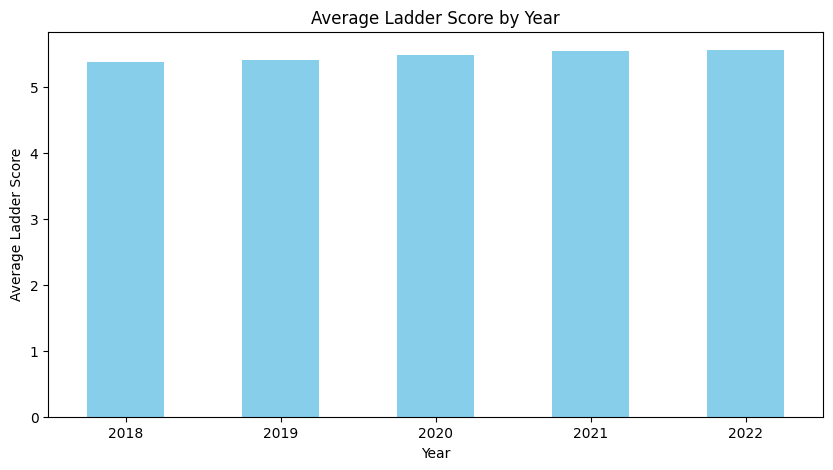

In [9]:
# Average Ladder Score by Year
average_ladder_score = combined_data.groupby('year')['life_ladder'].mean()
print("Average Ladder Score by Year:")
print(average_ladder_score)

# Optional: Visualizing the results
import matplotlib.pyplot as plt

# Plot Average Ladder Score by Year
plt.figure(figsize=(10, 5))
average_ladder_score.plot(kind='bar', color='skyblue')
plt.title("Average Ladder Score by Year")
plt.xlabel("Year")
plt.ylabel("Average Ladder Score")
plt.xticks(rotation=0)
plt.show()

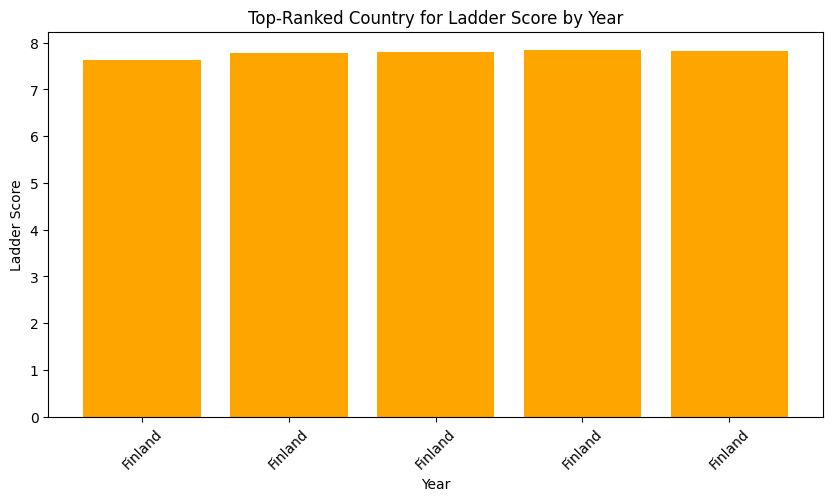

Top-Ranked Country for Each Year:
   year country_name  life_ladder
0  2018      Finland       7.6320
1  2019      Finland       7.7690
2  2020      Finland       7.8087
3  2021      Finland       7.8420
4  2022      Finland       7.8210


In [10]:
# Get rankings for each year
ranked_countries = combined_data.sort_values(['year', 'life_ladder'], ascending=[True, False])

# Keep the top-ranked country for each year
top_ranked_countries = ranked_countries.groupby('year').first().reset_index()

# Visualization: Top-Ranked Countries for Each Year
plt.figure(figsize=(10, 5))
plt.bar(top_ranked_countries['year'], top_ranked_countries['life_ladder'], color='orange')
plt.title("Top-Ranked Country for Ladder Score by Year")
plt.xlabel("Year")
plt.ylabel("Ladder Score")
plt.xticks(top_ranked_countries['year'], top_ranked_countries['country_name'], rotation=45)
plt.show()

# Print the rankings for each year
print("Top-Ranked Country for Each Year:")
print(top_ranked_countries[['year', 'country_name', 'life_ladder']])


In [13]:
# Calculate average GDP per capita
average_gdp = file_2023['log_gdp_per_capita'].mean()  # Changed 'gdp_per_capita' to 'log_gdp_per_capita'
print(f"Average GDP per Capita: {average_gdp:.2f}")

# Find the maximum GDP per capita
max_gdp = file_2023['log_gdp_per_capita'].max()  # Changed 'gdp_per_capita' to 'log_gdp_per_capita'
print(f"Highest GDP per Capita: {max_gdp:.2f}")

# Find the row with the highest GDP per capita
highest_gdp_row = file_2023.loc[file_2023['log_gdp_per_capita'].idxmax()]  # Changed 'gdp_per_capita' to 'log_gdp_per_capita'
print(f"Row with the Highest GDP per Capita:\n{highest_gdp_row}")

Average GDP per Capita: 9.46
Highest GDP per Capita: 11.66
Row with the Highest GDP per Capita:
log_gdp_per_capita                  11.660
social_support                       0.879
healthy_life_expectancy_at_birth    71.675
freedom_to_make_life_choices         0.915
generosity                           0.024
corruption                           0.345
life_ladder                          7.228
Name: 8, dtype: float64


In [15]:
# Find the row with the highest GDP per capita
highest_gdp_row = file_2023.loc[file_2023['log_gdp_per_capita'].idxmax()]
print(f"Row with the Highest GDP per Capita:\n{highest_gdp_row}")

Row with the Highest GDP per Capita:
log_gdp_per_capita                  11.660
social_support                       0.879
healthy_life_expectancy_at_birth    71.675
freedom_to_make_life_choices         0.915
generosity                           0.024
corruption                           0.345
life_ladder                          7.228
Name: 8, dtype: float64
